In [1]:
import torch
from slot_attention.model import SlotAttentionModel
from slot_attention.data import CLEVRERDataModule
from torchvision import transforms
from slot_attention.utils import rescale
import os
import numpy as np
from PIL import Image
os.environ["CUDA_VISIBLE_DEVICES"]="1" 

In [2]:
clevr_transforms = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Lambda(rescale),
    transforms.Resize((160,240)),
    ])

clevr_datamodule = CLEVRERDataModule(data_root='data/CLEVRER_v2/',
                                   
                                   train_batch_size=1,
                                   val_batch_size=1,
                                   clevr_transforms=clevr_transforms,
                                   num_workers=4)

In [3]:
model = SlotAttentionModel(resolution=(160,240),num_slots=7,num_iterations=3).cuda().eval()

In [4]:
state_dict = torch.load('wandb/run-20210312_164330-3sa2m0bw/files/slot-attention-clevrer/3sa2m0bw/checkpoints/epoch=499-step=112999.ckpt', map_location=lambda storage, loc: storage)['state_dict']
from collections import OrderedDict
state_dict_new = OrderedDict()
for k, v in state_dict.items():
    name = k[6:]  # 去掉 `model.`
    state_dict_new[name] = v

model.load_state_dict(state_dict_new)

<All keys matched successfully>

In [5]:
dl = clevr_datamodule.val_dataloader()

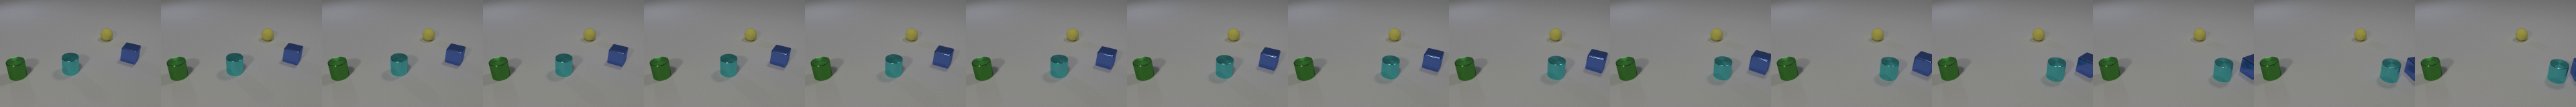

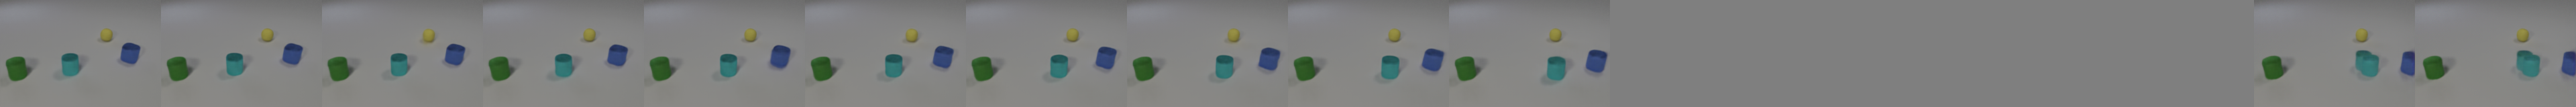

In [6]:
batch = next(iter(dl))
#recon_combined, recons, masks, slots, recon_combined_preds, recons_preds, masks_preds, slots_preds = model(batch)#

#x = torch.cat((recon_combined[0][:10],torch.zeros(4,3,160,240).cuda(),recon_combined_preds[0]),dim=0)
#display(Image.fromarray((((batch[0].permute(0,3,1,2).contiguous().view(-1,3,160).permute(1,2,0))*0.5+0.5).clamp(0, 1).detach().cpu().numpy()*255).astype(np.uint8).transpose(1,2,0)))
#display(Image.fromarray((((x.permute(0,3,1,2).contiguous().view(-1,3,160).permute(1,2,0))*0.5+0.5).clamp(0, 1).detach().cpu().numpy()*255).astype(np.uint8).transpose(1,2,0)))

recon_combined_, recons_, masks_, slots_, recon_combined_preds_, recons_preds_, masks_preds_, slots_preds_ = model(batch[:,list(range(16))[::-1],:,:])
x_ = torch.cat((recon_combined_[0][:10],torch.zeros(4,3,160,240).cuda(),recon_combined_preds_[0]),dim=0)
display(Image.fromarray((((batch[0][list(range(16))[::-1]].permute(0,3,1,2).contiguous().view(-1,3,160).permute(1,2,0))*0.5+0.5).clamp(0, 1).detach().cpu().numpy()*255).astype(np.uint8).transpose(1,2,0)))
display(Image.fromarray((((x_.permute(0,3,1,2).contiguous().view(-1,3,160).permute(1,2,0))*0.5+0.5).clamp(0, 1).detach().cpu().numpy()*255).astype(np.uint8).transpose(1,2,0)))

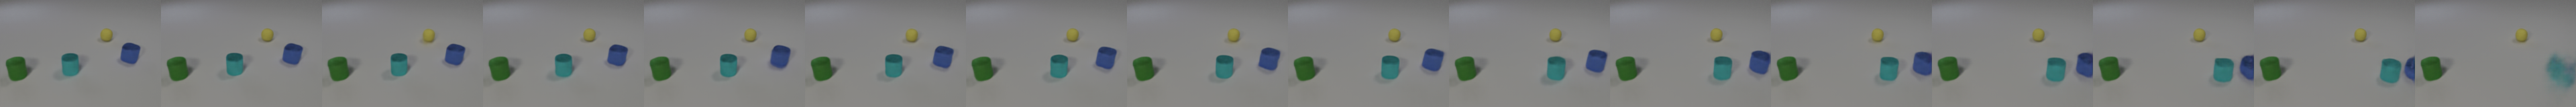

In [7]:
display(Image.fromarray((((recon_combined_[0].permute(0,3,1,2).contiguous().view(-1,3,160).permute(1,2,0))*0.5+0.5).clamp(0, 1).detach().cpu().numpy()*255).astype(np.uint8).transpose(1,2,0)))

In [8]:
recon_combined_preds_.shape

torch.Size([1, 2, 3, 160, 240])